In [12]:
import numpy as np
import matplotlib.pyplot as plt
from subprocess import call
import open3d as o3d
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D
import random



In [93]:
random.seed()
limit = 100
particles = 1000
ndim = 3
time=0
input = open('input.txt', 'w')
input.write(str(particles) + '\n')
input.write(str(ndim) + '\n')
input.write(str(time) + '\n')
for i in range(particles):
    input.write(str(0.01) + '\n')
for i in range(particles):
    input.write('\t' + str(random.uniform(-limit, limit)) + '\t' + str(random.uniform(-limit, limit)) + '\t' + str(random.uniform(-limit, limit)) + '\n')
for i in range(particles):
    input.write('\t' + str(random.uniform(-1, 1)) + '\t' + str(random.uniform(-1, 1)) + '\t' + str(random.uniform(-1, 1)) + '\n')
input.close()


In [70]:

def create_data(bestand):
    file = open(bestand, 'r')
    particles = int(file.readline())
    ndim = int(file.readline())
    time = float(file.readline())
    data = file.readlines()
    file.close()
    masses = data[0:particles-1]
    pos = data[particles:particles*2-1]
    vel = data[particles*2:particles*3-1]
    masses = [float(x) for x in masses]
    pos1 = []
    for x in pos:
        y = [float(y) for y in x.split()]
        pos1.append(y)
     
    for x in vel:
        y = [float(z) for z in x.split()]
        np.append(vel, np.array([y]))
    return np.array(pos1)

def plot_data(bestand):
    pos1 = create_data(bestand)
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(pos1[:,0], pos1[:,1], pos1[:,2], c='r', marker='o')
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    plt.show()

    



[ 0.  0. 78. 29. 22. 11.  8.  4.  3.  2.  3.  4.  2.  1.  2.  1.  2.  1.
  0.  1.  0.  0.  1.]


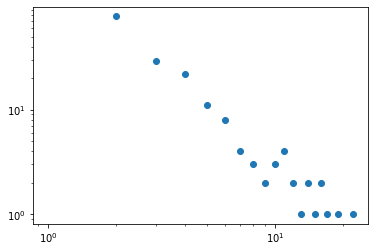

In [113]:

pos1 = create_data('run_640.txt')
model = DBSCAN(eps=15, min_samples = 2)
model.fit_predict(pos1)
pred = model.fit_predict(pos1)
"""
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter(pos1[:,0], pos1[:,1], pos1[:,2], c=model.labels_, cmap='rainbow', s=20, alpha=1)
plt.show()
print(model.labels_)"""

cluster_size = np.zeros(max(model.labels_)+2)
for x in model.labels_:
    cluster_size[x+1] += 1

nclusters = np.zeros(int(max(cluster_size[1:]) + 1))
for i in cluster_size[1:]:
    nclusters[int(i)] += 1    

plt.loglog(nclusters, 'o')
print(nclusters)

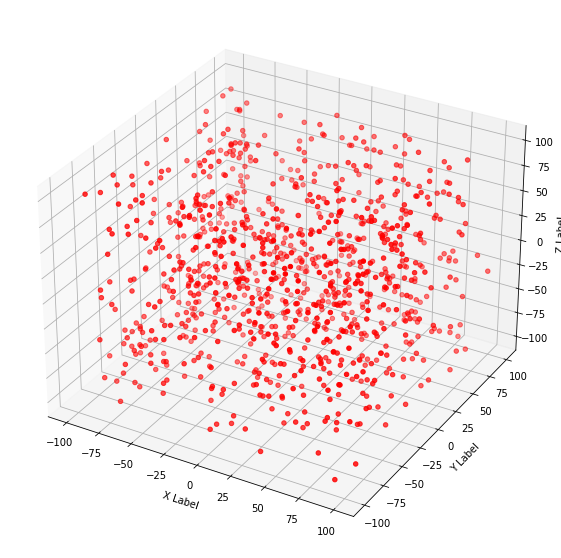

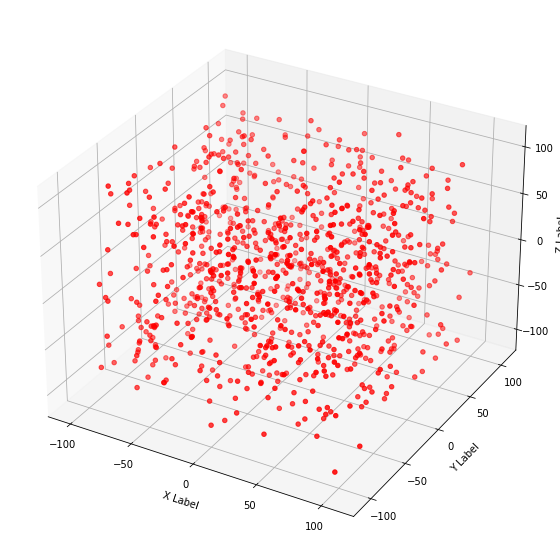

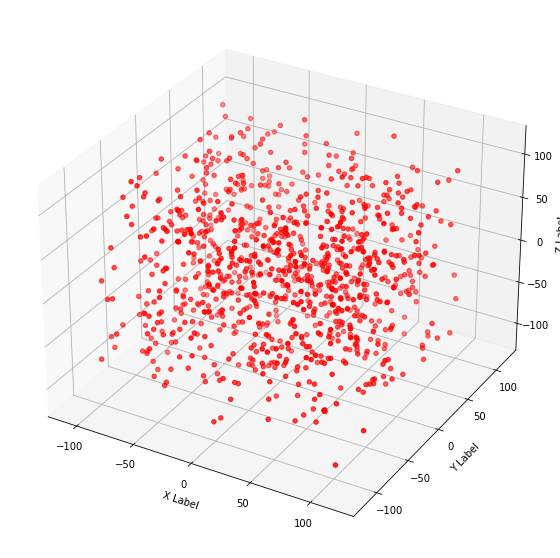

In [71]:
plot_data('run_000.txt')
plot_data('run_320.txt')
plot_data('run_640.txt')

In [108]:
list = [1,2,3,4,5,6,7]
print(list[1:])

[2, 3, 4, 5, 6, 7]
